### Description

In data-merger, we merged the data. In this notebook, we will create some basic visualizations of the data.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

aReserveDF = pd.read_csv('air_reserve.csv', parse_dates = ['visit_datetime', 'reserve_datetime']) 
aVisitDF = pd.read_csv('air_visit_data.csv', parse_dates = ['visit_date']) 
aStoreDF = pd.read_csv('air_store_info.csv')

hReserveDF = pd.read_csv('hpg_reserve.csv', parse_dates = ['visit_datetime', 'reserve_datetime']) 
hStoreDF = pd.read_csv('hpg_store_info.csv') 

dateInfoDF = pd.read_csv('date_info.csv', parse_dates = ['calendar_date'])
sampleSubmissionDF = pd.read_csv('sample_submission.csv') 
storeIdRelationDF = pd.read_csv('store_id_relation.csv') 
hReserveDF['visit_year'] = hReserveDF['visit_datetime'].dt.year
hReserveDF['visit_month'] = hReserveDF['visit_datetime'].dt.month
hReserveDF['visit_day'] = hReserveDF['visit_datetime'].dt.day
hReserveDF['reserve_year'] = hReserveDF['reserve_datetime'].dt.year#
hReserveDF['reserve_month'] = hReserveDF['reserve_datetime'].dt.month
hReserveDF['reserve_day'] = hReserveDF['reserve_datetime'].dt.day
hReserveDF.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)
hReserveDF = hReserveDF.groupby(['hpg_store_id', 'visit_year', 'visit_month','visit_day','reserve_year','reserve_month','reserve_day'], as_index=False).sum()
aReserveDF['visit_year'] = aReserveDF['visit_datetime'].dt.year
aReserveDF['visit_month'] = aReserveDF['visit_datetime'].dt.month
aReserveDF['visit_day'] = aReserveDF['visit_datetime'].dt.day
aReserveDF['reserve_year'] = aReserveDF['reserve_datetime'].dt.year
aReserveDF['reserve_month'] = aReserveDF['reserve_datetime'].dt.month
aReserveDF['reserve_day'] = aReserveDF['reserve_datetime'].dt.day
aReserveDF.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)
dateInfoDF['calendar_year'] = dateInfoDF['calendar_date'].dt.year
dateInfoDF['calendar_month'] = dateInfoDF['calendar_date'].dt.month
dateInfoDF['calendar_day'] = dateInfoDF['calendar_date'].dt.day
dateInfoDF.drop(['calendar_date'], axis=1, inplace=True)
aVisitDF['visit_year'] = aVisitDF['visit_date'].dt.year
aVisitDF['visit_month'] = aVisitDF['visit_date'].dt.month
aVisitDF['visit_day'] = aVisitDF['visit_date'].dt.day
aVisitDF.drop(['visit_date'], axis=1, inplace=True)
hReserveDF = pd.merge(hReserveDF, storeIdRelationDF, on='hpg_store_id', how='inner')
hReserveDF.drop(['hpg_store_id'], axis=1, inplace=True)
aReserveDF = pd.concat([aReserveDF, hReserveDF])
aReserveDF = aReserveDF.groupby(['air_store_id', 'visit_year', 'visit_month','visit_day'],\
                         as_index=False).sum().drop(['reserve_day','reserve_month','reserve_year'], axis=1)
aReserveDF = pd.merge(aReserveDF, dateInfoDF, left_on=['visit_year','visit_month','visit_day'], right_on=['calendar_year','calendar_month','calendar_day'], how='left')
aReserveDF.drop(['calendar_year','calendar_month','calendar_day'], axis=1, inplace=True)
aReserveDF = pd.merge(aReserveDF, aStoreDF, on='air_store_id', how='left')
trainDF = pd.merge(aReserveDF, aVisitDF, on=['air_store_id','visit_year','visit_month','visit_day'], how='left')
trainDF.fillna(0,inplace=True)

In [2]:
trainDF.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,visitors
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0


In [3]:
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)

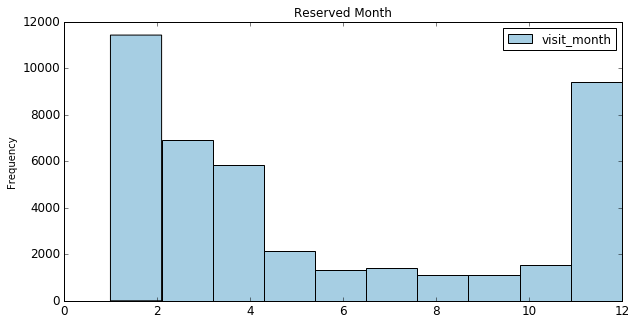

In [4]:
day_plot = trainDF['visit_month'].plot(kind='hist', title='Reserved Month', figsize=(10,5),legend=True,fontsize=12)

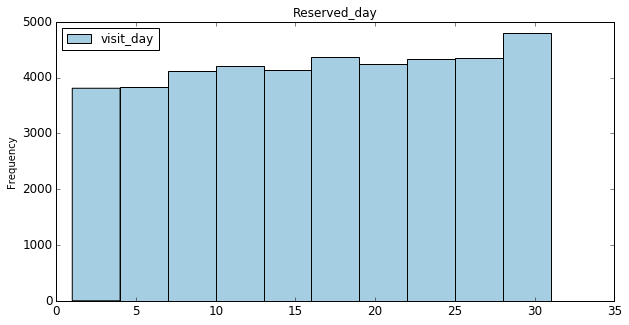

In [5]:
day_plot = trainDF['visit_day'].plot(kind='hist', title='Reserved_day', figsize=(10,5),legend=True,fontsize=12)

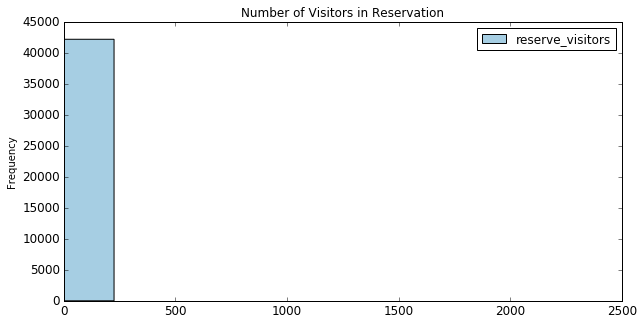

In [6]:
day_plot = trainDF['reserve_visitors'].plot(kind='hist', title='Number of Visitors in Reservation', figsize=(10,5),legend=True,fontsize=12)

In [7]:
pd.crosstab(index=trainDF['reserve_visitors'],columns="count")

col_0,count
reserve_visitors,
1,324
2,6466
3,2734
4,4170
5,2101
6,2728
7,1679
8,2179
9,1360
